In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print(np.__version__)
print(cv2.__version__)


1.26.4
4.10.0


In [3]:
img = cv2.imread('Gemini_Generated_Image_bxx5rqbxx5rqbxx5.png')
print(type(img))

<class 'numpy.ndarray'>


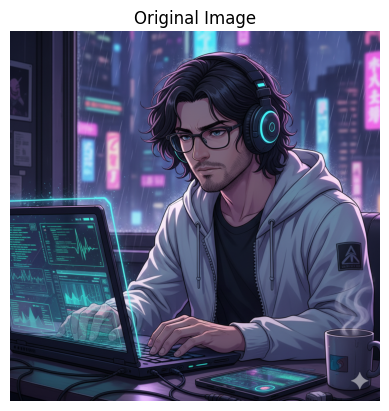

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [5]:
print("Shape: ", img.shape)
print("Array type: ",type(img))
print("Pixel[0:0]:",img[0,0])

Shape:  (1024, 1024, 3)
Array type:  <class 'numpy.ndarray'>
Pixel[0:0]: [17 21 42]


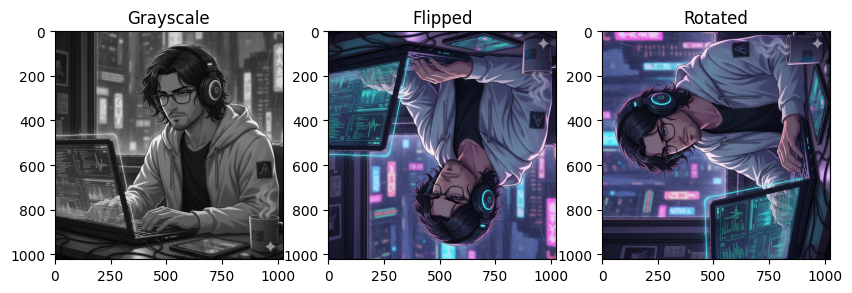

In [6]:
# Perform Basic Transformations
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
flipped = np.flipud(img)
rotated = np.rot90(img)

plt.figure(figsize=(10,6))
plt.subplot(1,3,1); plt.imshow(gray,cmap = 'gray'); plt.title("Grayscale")
plt.subplot(1,3,2); plt.imshow(flipped);plt.title("Flipped")
plt.subplot(1,3,3); plt.imshow(rotated);plt.title("Rotated")
plt.show()

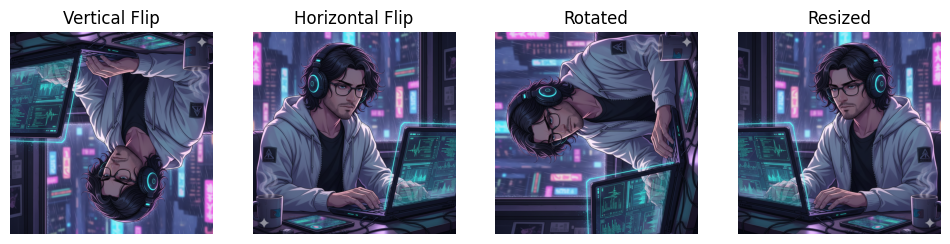

In [7]:
flipv = np.flipud(img)
fliph = np.fliplr(img)
rotated = np.rot90(img)
resized = cv2.resize(img,(img.shape[1]//2, img.shape[0]//2))

plt.figure(figsize=(12,6))
plt.subplot(1,4,1); plt.imshow(flipv);plt.title("Vertical Flip"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(fliph);plt.title("Horizontal Flip"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(rotated);plt.title("Rotated"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(resized);plt.title("Resized"); plt.axis('off')
plt.show()

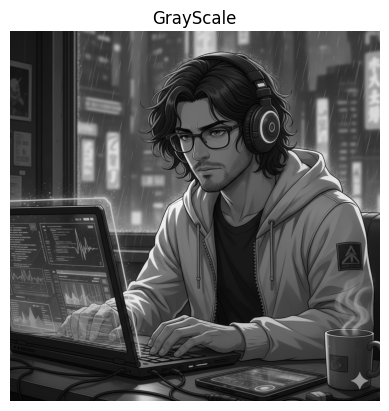

In [8]:
# GreyScale Conversion
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap = 'gray')
plt.title("GrayScale")
plt.axis('off')
plt.show()

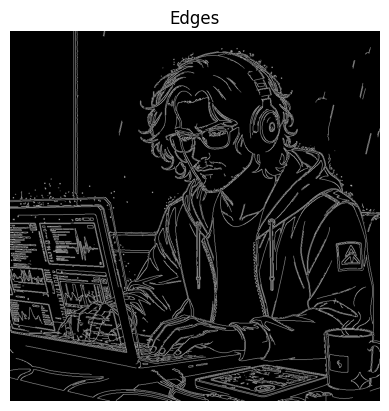

In [9]:
# Edge Detection
edges = cv2.Canny(gray,threshold1=100,threshold2=200)
plt.imshow(edges,cmap = 'gray')
plt.title("Edges")
plt.axis('off')
plt.show()

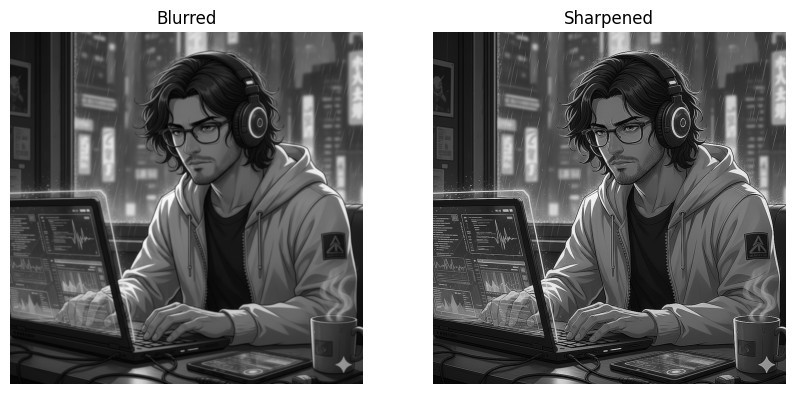

In [10]:
# Blurring and Sharpening
blurred = cv2.GaussianBlur(gray,(5,5),0)
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv2.filter2D(gray,-1,kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1);plt.imshow(blurred,cmap='gray');plt.title("Blurred");plt.axis('off')
plt.subplot(1,2,2);plt.imshow(sharpened,cmap='gray');plt.title("Sharpened");plt.axis('off')
plt.show()

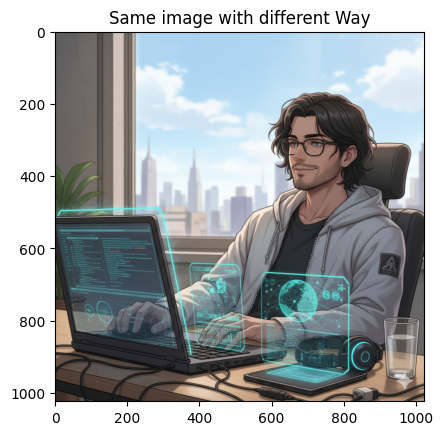

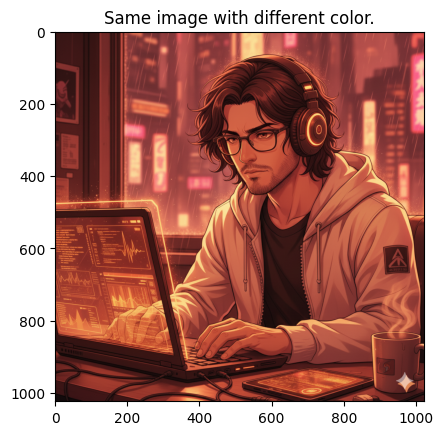

In [11]:


img2 = cv2.imread('Gemini_Generated_Image_9xk0wi9xk0wi9xk0.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('Gemini_Generated_Image_k8g7a2k8g7a2k8g7.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.title("Same image with different Way")
plt.show()

plt.imshow(img3)
plt.title("Same image with different color.")
plt.show()

In [12]:
gray1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [13]:
#Image Similarity (Pixel-Wise) for same image.
gray2_resized = cv2.resize(gray2,(gray1.shape[1],gray1.shape[0]))

# Mean Squared Error (MSE)
mse = np.mean((gray1-gray2_resized)**2)
print("MSE between Images: ", mse)

#Structural Similarity (optional, requires skimage)
from skimage.metrics import structural_similarity as ssim
similarity = ssim(gray1, gray2_resized)
print("SSIM between images: ", similarity)


MSE between Images:  0.0
SSIM between images:  1.0


In [14]:
gray1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)



In [15]:
#Image Similarity (Pixel-Wise) for same image.
gray2_resized = cv2.resize(gray2,(gray1.shape[1],gray1.shape[0]))

# Mean Squared Error (MSE)
mse = np.mean((gray1-gray2_resized)**2)
print("MSE between Images: ", mse)

#Structural Similarity (optional, requires skimage)
from skimage.metrics import structural_similarity as ssim
similarity = ssim(gray1, gray2_resized)
print("SSIM between images: ", similarity)


MSE between Images:  105.11373043060303
SSIM between images:  0.2546150469408513


In [16]:
gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)


In [17]:
#Image Similarity (Pixel-Wise) for same image.
gray3_resized = cv2.resize(gray3,(gray1.shape[1],gray1.shape[0]))

# Mean Squared Error (MSE)
mse = np.mean((gray1-gray3_resized)**2)
print("MSE between Images: ", mse)

#Structural Similarity (optional, requires skimage)
from skimage.metrics import structural_similarity as ssim
similarity = ssim(gray1, gray3_resized)
print("SSIM between images: ", similarity)


MSE between Images:  101.13885688781738
SSIM between images:  0.3825546811420429


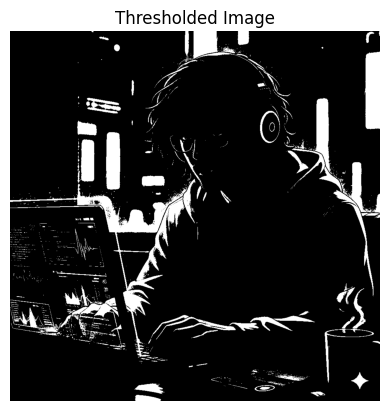

In [21]:
#4 ThreshHold and Masking 
# Applying Binary Threshold
_, thresh = cv2.threshold(gray1,128,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

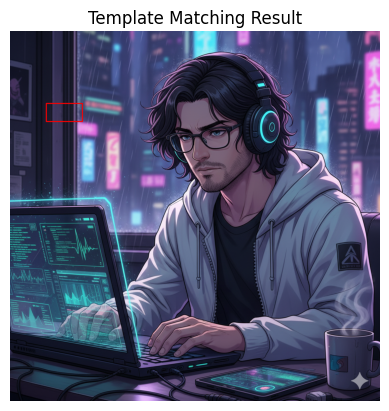

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
template = gray[200:250, 100:200]
w, h = template.shape[::-1]

res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
img_detect = img.copy()
cv2.rectangle(img_detect, top_left, bottom_right, (255, 0, 0), 2)

plt.imshow(img_detect)
plt.title("Template Matching Result")
plt.axis('off')
plt.show()


In [33]:
#5 Template Matching (Basic Recognition)
# template = cv2.imread('template.jpg',cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
template = img[100:200, 100:200]
w,h = template.shape[:2]

res = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0]+w,top_left[1]+h)
img_detect = img.copy()
cv2.rectangle(img_detect, top_left,bottom_right,(255,0,0), 2)

plt.imshow(img_detect)
plt.title("Template Matching Result")
plt.axis('off')
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'
